# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Globals & Functions

In [3]:
def checkData(x):
    print(f"\nInfo dos valores:\n")
    print(x.info())
    print(f"\nDescrição dos dados:\n\n{x.describe()}")
    return

def checkNaN(x):
    """This function receives a DataFrame and returns the count of NaN values for each column."""
    null_count = x.isna().sum()
    non_null_count = x.notnull().sum()
    print(f"Null values:\n {null_count}")
    print(f"Non-null values:\n {non_null_count}")
    return

def checkOutliers(x):
    """This functions receives a DataFrame and returns a DataFrame with the outliers.
    It takes as premise that the data is normally distributed."""
    dfOutliers  = pd.DataFrame()
    # Itera sobre as colunas númericas
    for column in x.select_dtypes(include=[np.number]).columns:
        # Calcula o 1 quartil (Q1)
        Q1 = x[column].quantile(0.25)
        # Calcula o 3 quartil (Q3)
        Q3 = x[column].quantile(0.75)
        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites inferior e superior para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identica os outliers da coluna atual e adiciona ao DataFrame de outliers
        outliers = x[(x[column] < lower_bound) | (x[column] > upper_bound)]
        # Concatene os outliers da coluna atual ao DataFrame de outliers
        dfOutliers = pd.concat([dfOutliers, outliers])
    outliersData = dfOutliers.drop_duplicates().reset_index(drop=True)
    return outliersData

def corr(x):
    plt.figure(figsize=(10,8))
    sns.heatmap(x.select_dtypes(include=[np.number]).corr(), annot=True)
    plt.show()
    return

def hist(x):
    """This function receives a DataFrame and returns a histogram of the data."""
    x.hist(bins=50, figsize=(25,10))
    plt.show()
    return




# Data Loading & Check

In [4]:
df_raw = pd.read_csv("train.csv")

In [5]:
checkData(df_raw)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4467 non-null   object 
 1   Delivery_person_ID           4467 non-null   object 
 2   Delivery_person_Age          4467 non-null   object 
 3   Delivery_person_Ratings      4467 non-null   object 
 4   Restaurant_latitude          4467 non-null   float64
 5   Restaurant_longitude         4467 non-null   float64
 6   Delivery_location_latitude   4467 non-null   float64
 7   Delivery_location_longitude  4467 non-null   float64
 8   Order_Date                   4467 non-null   object 
 9   Time_Orderd                  4467 non-null   object 
 10  Time_Order_picked            4467 non-null   object 
 11  Weatherconditions            4467 non-null   object 
 12  Road_traffic_density         4467 non-null   object 
 13

In [6]:
df_raw.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1473,0x33bd,SURRES06DEL03,37,4.6,21.185047,72.808590,21.245047,72.868590,03-03-2022,22:10:00,22:15:00,conditions Stormy,Low,1,Buffet,motorcycle,1,No,Metropolitian,(min) 26
855,0xe199,BHPRES07DEL02,34,4.7,0.000000,0.000000,0.130000,0.130000,12-02-2022,21:15:00,21:30:00,conditions Cloudy,Jam,1,Drinks,motorcycle,2,No,Metropolitian,(min) 40
2835,0x3593,MUMRES18DEL01,20,4.6,19.109300,72.825451,19.119300,72.835451,11-03-2022,09:10:00,09:20:00,conditions Sandstorms,Low,1,Meal,motorcycle,0,No,Metropolitian,(min) 16
689,0xce38,GOARES19DEL02,24,4.7,0.000000,0.000000,0.020000,0.020000,11-02-2022,10:40:00,10:45:00,conditions Windy,Low,2,Drinks,scooter,1,No,Metropolitian,(min) 16
1833,0xd605,LUDHRES010DEL02,39,3.5,30.892860,75.822199,31.022860,75.952199,16-02-2022,17:25:00,17:40:00,conditions Stormy,Medium,1,Drinks,scooter,0,No,Metropolitian,(min) 37
284,0xd7d3,DEHRES12DEL02,39,4.1,0.000000,0.000000,0.130000,0.130000,14-02-2022,21:35:00,21:40:00,conditions Cloudy,Jam,1,Drinks,motorcycle,2,No,Metropolitian,(min) 39
2223,0x8a65,INDORES18DEL02,21,5,22.753839,75.897429,22.833838,75.977429,08-03-2022,22:55:00,23:05:00,conditions Windy,Low,2,Buffet,motorcycle,1,No,NaN,(min) 17
2204,0xa875,JAPRES19DEL02,38,4.8,26.913726,75.752820,26.993726,75.832820,02-04-2022,22:20:00,22:35:00,conditions Cloudy,Low,2,Drinks,electric_scooter,1,No,Urban,(min) 29
1697,0x93ce,CHENRES12DEL02,31,4.7,12.972793,80.249982,12.992793,80.269982,09-03-2022,10:30:00,10:45:00,conditions Windy,Low,2,Buffet,scooter,1,No,Urban,(min) 21
4449,0x6bff,JAPRES04DEL03,31,4.7,26.902328,75.794257,26.932328,75.824257,21-03-2022,19:10:00,19:25:00,conditions Cloudy,Jam,1,Meal,motorcycle,1,No,Metropolitian,(min) 30


# Clear & Transform

Clearly some columns have NaN values, but they are not appearing on the NaNs check. It can be because they are object types or are stored as string and have some weird formatting like " NaN", with a blank space.<br>First steps will be: drop excess of NaNs and remove all spaces from string columns, then convert them to the appropiate type and fill with the most appropriate value.

## Drop excess of NaNs

In [7]:
df_clear = df_raw.copy()
# To keep it simple, rows with more than 2 NaNs will be dropped
df_clear = df_clear.dropna(thresh=len(df_clear.columns) - 2).reset_index(drop=True)
# Theres only 1 NaN on "Time_taken(min)", and since it will be lot of work to estipulate, it will be dropped
df_clear = df_clear.dropna(subset=["Time_taken(min)"]).reset_index(drop=True)

## Strip spaces, fix typos and types

In [8]:
# Remove blank spaces from strings.
df_clear = df_clear.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Convert to numeric types where needed.
df_clear["Delivery_person_Age"] = df_clear["Delivery_person_Age"].apply(pd.to_numeric, errors="coerce").astype("Int64")
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].apply(pd.to_numeric, errors="coerce")
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].apply(pd.to_numeric, errors="coerce").astype("Int64")
# Fix typo on column name
df_clear.rename(columns={"Time_Orderd": "Time_Ordered"}, inplace=True)
# Convert dates and times to datetime objects, than to string to better work with it later.
df_clear["Order_Date"] = pd.to_datetime(df_clear["Order_Date"], format="%d-%m-%Y").astype("string")
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Time_Ordered"], format="%H:%M:%S").dt.time.astype("string")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear["Time_Order_picked"], format="%H:%M:%S").dt.time.astype("string")
# Remove letters from the Column "Time_taken(min)" and change it to Int64
df_clear["Time_taken(min)"] = df_clear["Time_taken(min)"].str.extract(r'(\d+)').astype("Int64")


In [9]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4466 non-null   object 
 1   Delivery_person_ID           4466 non-null   object 
 2   Delivery_person_Age          4277 non-null   Int64  
 3   Delivery_person_Ratings      4271 non-null   float64
 4   Restaurant_latitude          4466 non-null   float64
 5   Restaurant_longitude         4466 non-null   float64
 6   Delivery_location_latitude   4466 non-null   float64
 7   Delivery_location_longitude  4466 non-null   float64
 8   Order_Date                   4466 non-null   string 
 9   Time_Ordered                 4287 non-null   string 
 10  Time_Order_picked            4466 non-null   string 
 11  Weatherconditions            4466 non-null   object 
 12  Road_traffic_density         4466 non-null   object 
 13

## Merge coordinates as touple in a new column

To better work with coordinates, they will be stored as a touple.


In [10]:
df_clear["Restaurant_location"] = list(zip(df_clear["Restaurant_latitude"], df_clear["Restaurant_longitude"]))
df_clear["Delivery_location"] = list(zip(df_clear["Delivery_location_latitude"], df_clear["Delivery_location_longitude"]))
df_clear.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], inplace=True)


## Merge Dates and Times

To better work with time, "Order_date" will be merged with "Time_Ordered" and "Time_Order_picked". For the same reason "Time_taken(min)" will be transformed to a date.time based on "Time_Order_picked" + "Time_taken(secs)".

In [11]:
# Merge date and time columns for better timestamp conversion
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Order_Date"] + " " + df_clear["Time_Ordered"], format="%Y-%m-%d %H:%M:%S")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear['Order_Date'] + " " + df_clear["Time_Order_picked"], format="%Y-%m-%d %H:%M:%S")
# Add 1 day to order made before midnight and delivered after
df_clear["Time_Order_picked"] = df_clear.apply(lambda row: row["Time_Order_picked"] + pd.Timedelta(days=1) if row["Time_Ordered"] > row["Time_Order_picked"] else row["Time_Order_picked"], axis=1)
# Calculate delivery time based on Time_order_pick + time_taken
df_clear["Time_Order_delivered"] = df_clear["Time_Order_picked"] + pd.to_timedelta(df_clear["Time_taken(min)"], unit="m")
# Drop unnecessary columns
df_clear.drop(["Order_Date", "Time_taken(min)"], axis=1, inplace=True)

## Filling NaNs

In [12]:
print(f"Delivery person age median: {df_clear['Delivery_person_Age'].median()}")
print(f"Delivery person age mean: {df_clear['Delivery_person_Age'].mean()}")

Delivery person age median: 29.0
Delivery person age mean: 29.449614215571664


The "Delivery_Person_Age" column is ~29 for both median and mean values, so lets fill the NaNs with de median, since its a Int and mean is a float.<br>A better approach would be apply a method like "KNN", but in this exercise let's stay on the basics.

In [13]:
df_clear["Delivery_person_Age"] = df_clear['Delivery_person_Age'].fillna(df_clear['Delivery_person_Age'].median())

NaNs on "Time_ordered" can be stipulated based on the other orders, grouped by type of order.<br>The assunption here is, meals probably have a longer preparation time than buffet, that have a longer time than drinks, that have a longer time than snacks.

In [14]:
df_aux = df_clear[["Time_Ordered", "Time_Order_picked", "Time_Order_delivered", "Type_of_order"]].dropna()
df_aux["Time_to_pick"] = (df_aux["Time_Order_picked"] - df_aux["Time_Ordered"]).dt.total_seconds() / 60
df_aux["Time_to_delivery"] = (df_aux["Time_Order_delivered"] - df_aux["Time_Order_picked"]).dt.total_seconds() / 60
df_aux = df_aux.drop(columns=["Time_Ordered", "Time_Order_picked", "Time_Order_delivered"])
df_times_grouped = df_aux.groupby(["Type_of_order"]).agg(["mean", "median"]).reset_index()
df_times_grouped

Type_of_order Time_to_pick        Time_to_delivery       
                        mean median             mean median
0        Buffet     9.781784   10.0        26.122391   25.0
1        Drinks     9.841954   10.0        26.286398   25.5
2          Meal    10.032110   10.0        26.225688   25.0
3         Snack     9.977252   10.0        26.482257   26.0

The assunption wasn't exactly true, but we can use the "Time_to_pick" median to calculate when the orders with NaNs where made without much distortion on the data.

In [15]:
df_clear["Time_Ordered"] = df_clear["Time_Ordered"].fillna(df_clear["Time_Order_picked"] - pd.to_timedelta(df_times_grouped.loc[0, ("Time_to_pick", "median")], unit="m"))

In [16]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4466 non-null   object        
 1   Delivery_person_ID       4466 non-null   object        
 2   Delivery_person_Age      4466 non-null   Int64         
 3   Delivery_person_Ratings  4271 non-null   float64       
 4   Time_Ordered             4466 non-null   datetime64[ns]
 5   Time_Order_picked        4466 non-null   datetime64[ns]
 6   Weatherconditions        4466 non-null   object        
 7   Road_traffic_density     4466 non-null   object        
 8   Vehicle_condition        4466 non-null   int64         
 9   Type_of_order            4466 non-null   object        
 10  Type_of_vehicle          4466 non-null   object        
 11  multiple_deliveries      4362 non-null   Int64         
 12  Festival      

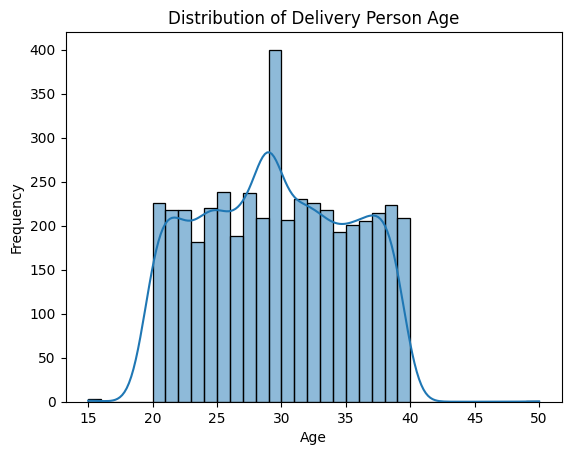

In [17]:
sns.histplot(df_clear["Delivery_person_Age"], kde=True, bins=range(int(df_clear["Delivery_person_Age"].min()), int(df_clear["Delivery_person_Age"].max()) + 1))
plt.title("Distribution of Delivery Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [18]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4466 non-null   object        
 1   Delivery_person_ID       4466 non-null   object        
 2   Delivery_person_Age      4466 non-null   Int64         
 3   Delivery_person_Ratings  4271 non-null   float64       
 4   Time_Ordered             4466 non-null   datetime64[ns]
 5   Time_Order_picked        4466 non-null   datetime64[ns]
 6   Weatherconditions        4466 non-null   object        
 7   Road_traffic_density     4466 non-null   object        
 8   Vehicle_condition        4466 non-null   int64         
 9   Type_of_order            4466 non-null   object        
 10  Type_of_vehicle          4466 non-null   object        
 11  multiple_deliveries      4362 non-null   Int64         
 12  Festival      

In [19]:
df_clear["Delivery_location"]

0       (22.765049, 75.912471)
1       (13.043041, 77.813237)
2         (12.924264, 77.6884)
3       (11.053669, 77.026494)
4       (13.012793, 80.289982)
                 ...          
4461    (10.050683, 76.340631)
4462    (21.220437, 72.834209)
4463    (23.264992, 77.497227)
4464    (22.617821, 88.440581)
4465    (22.835049, 75.982471)
Name: Delivery_location, Length: 4466, dtype: object

# Feature Enginnereering

In [20]:
df_work = df_clear.copy()

As perguntas de negócio
 1. Qual o número total de entregadores cadastrados na base de dados?
 2. Qual o número total de entregadores únicos cadastrados na base de dados?
 3. Qual a idade do entregador mais velho? E do mais novo?
 4. Qual o ID do entregador com a maior idade? E o ID do entregaor com a 
menor idade?
 5. Quais os nomes das condições climáticas?
6. Quantas entregas foram realizadas sob condições climáticas de tempestade 
de areia? ( Sandstorms )
 7. Quais eram as condicões climáticas da data mais recente de entrega?
 8. Quantos tipos de densidade de trânsito existem na base de dados? Quais os 
nomes delas?
 9. Quantas entregas foram feitas em cada condição climática?
 10. Quantos entregadores únicos fizeram entregas em cada condição climática?
 11. Quantas entregas foram feitas em cada tipo de densidade de trânsito?
 12. Quantos entregadores únicos fizeram entregas em cada tipo de densidade 
de trânsito?
 13. Quantas cidades únicas existem na base? Quais são os seus nomes?
 14. Quantos tipos de veículos únicos existem na base?
 15. Qual o tipo de veículo que mais vez entregas com a condição de trânsito 
pesado? ( High )
 16. Qual o tipo de pedido mais feito durante condições climáticas de tempestade 
de areia?
 17. Qual a cidade com o maior número de pedidos de Bebidas (Drinks) feito em 
Scooter?
 18. Qual o nome da cidade com o (os) entregador mais velho? E o nome da 
cidade com o (os) entregadores mais novos?
 19. Quantas entregas foram feitas durante o Festival?
 20. Quantas cidades únicas tiveram entregas feitas durante o Festival?
 21. Quantas entregas foram feitas durante o Festival na cidade chamada Urban 
("Urban")